In [1]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
     

In [3]:
X, y = sklearn.datasets.load_digits(
    return_X_y = True,
    as_frame = True
)

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y,
    test_size = 0.25
)

In [7]:
len(X_train), len(X_test)

(1347, 450)

In [9]:
X_train.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
401,0.0,1.0,8.0,8.0,9.0,13.0,8.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0
984,0.0,0.0,1.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,2.0,12.0,16.0,15.0,5.0,0.0
1322,0.0,1.0,14.0,16.0,16.0,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,15.0,15.0,5.0,0.0,0.0,0.0
709,0.0,1.0,11.0,15.0,16.0,9.0,0.0,0.0,0.0,3.0,...,5.0,0.0,0.0,0.0,15.0,16.0,12.0,5.0,0.0,0.0
891,0.0,0.0,4.0,12.0,16.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,12.0,13.0,9.0,0.0,0.0


In [11]:
y_train.head()

401     5
984     6
1322    5
709     3
891     2
Name: target, dtype: int64

In [13]:
def get_image(X:pd.DataFrame, y: pd.DataFrame, idx: int, plot: bool = True):
    image = X.iloc[idx]
    label = y.iloc[idx]

    if plot:
        plt.imshow(image.values.reshape(8,8) / 16, cmap = "gray" )
        plt.title(f"Label: {label}")
        plt.axis(False)
        plt.show

    return image, label  

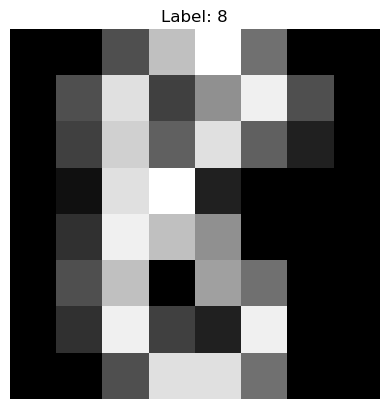

In [15]:
get_image(X_train, y_train, idx = 100, plot = True);

In [17]:
model = sklearn.linear_model.LogisticRegression(max_iter=3000)

In [19]:
model.fit( X_train, y_train )

LogisticRegression(max_iter=3000)

102


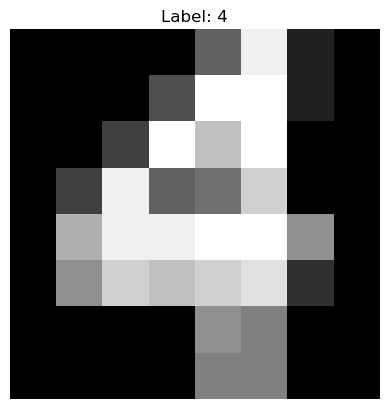

In [21]:
np.random.seed(42)
RANDOM_IDX = np.random.randint(0, len(X_test))
RANDOM_IDX
print(RANDOM_IDX)
image, label = get_image(X_test, y_test, RANDOM_IDX)

In [23]:
y_pred = model.predict(image.values.reshape(1, -1))
print(f"Prediction: {y_pred}")
print(f"Label: {label}")

Prediction: [4]
Label: 4


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
y_pred = model.predict( X_test )

In [27]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96
